In [75]:
# importing pandas
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import plotly.graph_objects as go

In [15]:
# Read the CSV file
police_file = ("/Users/jnellniz/Desktop/Police_Incidents_2023.csv")
df = pd.read_csv(police_file)

In [16]:
# Select relevant columns
selected_columns = ['publicaddress', 'caseNumber', 'precinct', 'reportedDate', 'reportedDateTime',
                    'offense', 'description', 'centerLong', 'centerLat', 'centerX', 'centerY', 'neighborhood']
new_df = df[selected_columns]

In [18]:
# Save selected data to CSV
new_df.to_csv('autoth_dataframe.csv', index=False)

In [19]:
# Filter data for 'AUTOTH' offense
autoth_df = new_df[new_df["offense"] == "AUTOTH"]
autoth_df = autoth_df.reset_index(drop=True)

In [20]:
# Save filtered data to SQLite database
conn = sqlite3.connect("autotheft.db")
autoth_df.to_sql('autotheft_tb', conn, index=False, if_exists='replace', dtype={'id': 'INTEGER PRIMARY KEY'})

7995

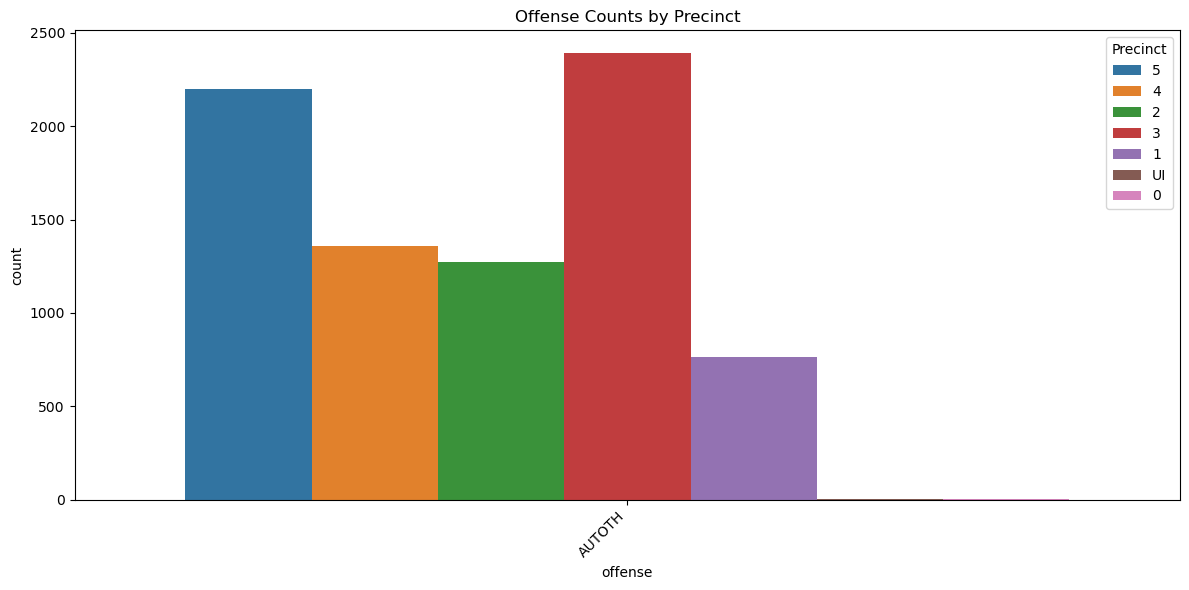

In [24]:
# Plot offense counts by neighborhood
plt.figure(figsize=(12, 6))
sns.countplot(x='offense', hue='precinct', data=autoth_df)
plt.title('Offense Counts by Precinct')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Precinct', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [38]:
autoth_df['precinct'].unique()

array(['5', '4', '2', '3', '1', 'UI', '0'], dtype=object)

In [39]:
# Drop unique value from a column
column_name = 'precinct'
unique_values = ['UI', '0']

df_clean = autoth_df[~autoth_df[column_name].isin(unique_values)]

In [40]:
df_clean

publicaddress    caseNumber precinct  \
0     BLAISDELL AVE / 26TH ST W   MP202337360        5   
1           0026XX GIRARD AVE N   MP202346685        4   
2         0020XX CENTRAL AVE NE   MP202347923        2   
3             0030XX 29TH AVE S   MP202348059        3   
4          0057XX BLAISDELL AVE   MP202348108        5   
...                         ...           ...      ...   
7990        0028XX DUPONT AVE S  MP2023343496        5   
7991        0035XX BRYANT AVE N  MP2023343505        4   
7992           0010XX 27TH ST W  MP2023343517        5   
7993          0021XX PENN AVE S  MP2023343518        5   
7994          0020XX ELLIOT AVE  MP2023343616        3   

                reportedDate        reportedDateTime offense  \
0     2023/02/15 00:00:00+00  2023/02/15 12:57:00+00  AUTOTH   
1     2023/02/26 00:00:00+00  2023/02/26 15:23:00+00  AUTOTH   
2     2023/02/27 00:00:00+00  2023/02/27 21:43:00+00  AUTOTH   
3     2023/02/28 00:00:00+00  2023/02/28 03:00:00+00  AUTOTH   
4     2023/02/28 00:00:00+00  2023/02/28 09:07:00+00  AUTOTH   
...                      ...                     ...     ...   
7990  2023/12/28 00:00:00+00  2023/12/28 08:44:00+00  AUTOTH   
7991  2023/12/28 00:00:00+00  2023/12/28 09:06:00+00  AUTOTH   
7992  2023/12/28 00:00:00+00  2023/12/28 09:36:00+00  AUTOTH   
7993  2023/12/28 00:00:00+00  2023/12/28 09:46:00+00  AUTOTH   
7994  2023/12/28 00:00:00+00  2023/12/28 11:22:00+00  AUTOTH   

           description  centerLong  centerLat      centerX      centerY  \
0     AUTOMOBILE THEFT   -93.27964   44.95553 -10383841.88  5614523.862   
1     AUTOMOBILE THEFT   -93.29683   45.00686 -10385756.02  5622602.050   
2     AUTOMOBILE THEFT   -93.24737   45.00939 -10380249.37  5622999.848   
3     AUTOMOBILE THEFT   -93.23000   44.94761 -10378316.53  5613277.544   
4     AUTOMOBILE THEFT   -93.27937   44.89877 -10383812.49  5605599.538   
...                ...         ...        ...          ...          ...   
7990  AUTOMOBILE THEFT   -93.29317   44.95100 -10385348.61  5613810.115   
7991  AUTOMOBILE THEFT   -93.29056   45.01942 -10385057.08  5624579.539   
7992  AUTOMOBILE THEFT   -93.29252   44.95374 -10385275.80  5614241.894   
7993  AUTOMOBILE THEFT   -93.30841   44.96059 -10387044.43  5615319.870   
7994  AUTOMOBILE THEFT   -93.26109   44.96226 -10381777.38  5615581.952   

         neighborhood  
0            Whittier  
1              Jordan  
2         Windom Park  
3          Longfellow  
4              Windom  
...               ...  
7990  Lowry Hill East  
7991  Webber - Camden  
7992  Lowry Hill East  
7993          Kenwood  
7994  Ventura Village  

[7992 rows x 12 columns]

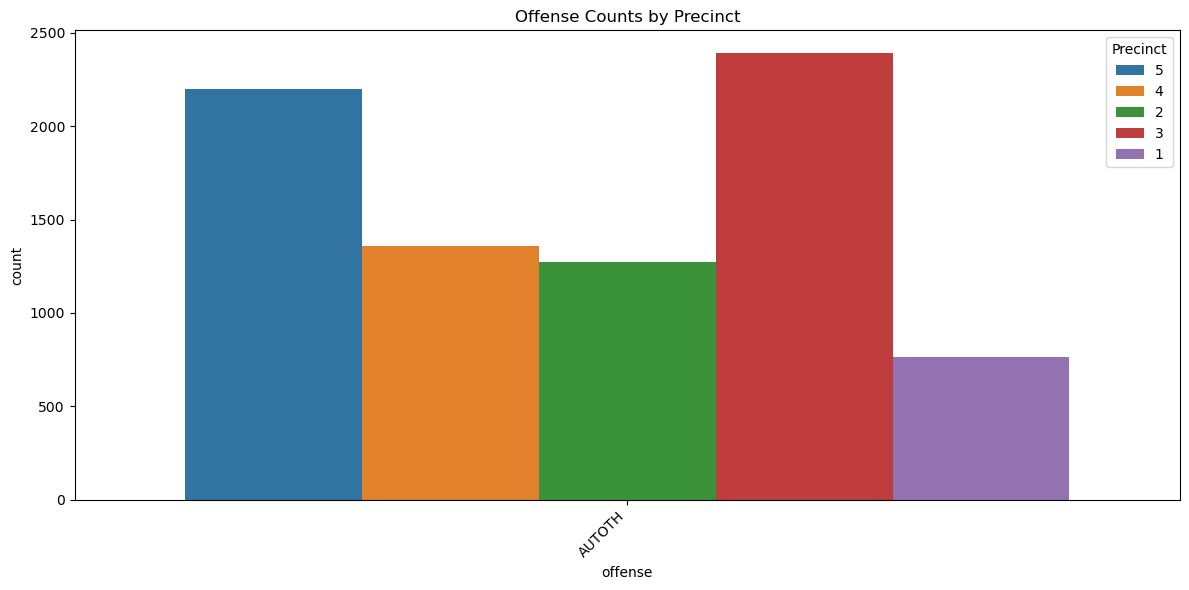

In [41]:
# Plot offense counts by neighborhood
plt.figure(figsize=(12, 6))
sns.countplot(x='offense', hue='precinct', data=df_clean)
plt.title('Offense Counts by Precinct')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Precinct', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [70]:
# Convert "reportedDate" column to datetime
autoth_df["reportedDate"] = pd.to_datetime(autoth_df["reportedDate"])

# Create DataFrames for each precinct
precincts = ["1", "2", "3", "4", "5"]
df_precincts = []

for precinct in precincts:
    df_precinct = autoth_df[autoth_df["precinct"] == precinct]["reportedDate"]
    df_precinct = pd.DataFrame(df_precinct)
    df_precincts.append(df_precinct)

# Print DataFrames for each precinct
for i, df_precinct in enumerate(df_precincts):
    print(f"Dateprecinct{i+1}:")
    print(df_precinct)
    print()

# Combine DataFrames for each precinct
df_concat = pd.concat(df_precincts)

# Count occurrences by date for each precinct
df_count = (df_concat["reportedDate"]
            .value_counts()
            .rename_axis('date')
            .reset_index(name='count')
            .sort_values("date"))

print(df_count)

# Resample data for each precinct by week
df_resampled = pd.concat([df_precinct.resample("W", on="reportedDate").size() for df_precinct in df_precincts], axis=1)
df_resampled.columns = [f"precinct {i+1}" for i in range(len(df_precincts))]

print(df_resampled)

Dateprecinct1:
                  reportedDate
12   2023-02-28 00:00:00+00:00
14   2023-02-28 00:00:00+00:00
31   2023-03-01 00:00:00+00:00
46   2023-09-17 00:00:00+00:00
50   2023-09-17 00:00:00+00:00
...                        ...
7897 2023-01-16 00:00:00+00:00
7908 2023-01-16 00:00:00+00:00
7912 2023-01-16 00:00:00+00:00
7937 2024-01-05 00:00:00+00:00
7946 2024-01-11 00:00:00+00:00

[765 rows x 1 columns]

Dateprecinct2:
                  reportedDate
2    2023-02-27 00:00:00+00:00
9    2023-02-28 00:00:00+00:00
17   2023-02-28 00:00:00+00:00
19   2023-02-28 00:00:00+00:00
20   2023-02-28 00:00:00+00:00
...                        ...
7969 2023-10-23 00:00:00+00:00
7972 2023-12-27 00:00:00+00:00
7976 2023-12-27 00:00:00+00:00
7977 2023-12-27 00:00:00+00:00
7986 2023-12-27 00:00:00+00:00

[1275 rows x 1 columns]

Dateprecinct3:
                  reportedDate
3    2023-02-28 00:00:00+00:00
5    2023-02-28 00:00:00+00:00
6    2023-02-28 00:00:00+00:00
7    2023-02-28 00:00:00+00:00
16   

In [71]:
#https://stackoverflow.com/questions/59406167/plotly-how-to-filter-a-pandas-dataframe-using-a-dropdown-menu
NPERIODS = 365

# # plotly
fig = go.Figure()

# set up ONE trace
fig.add_trace(go.Scatter(x=df_scatter.index,
                         y=df_scatter[df_scatter.columns[0]],
                         visible=True)
             )

updatemenu = []
buttons = []

# button with one option for each dataframe
for col in df_scatter.columns:
    buttons.append(dict(method='restyle',
                        label=col,
                        visible=True,
                        args=[{'y':[df_scatter[col]],
                               'x':[df_scatter.index],
                               'type':'scatter'}, [0]],
                        )
                  )

# some adjustments to the updatemenus
updatemenu = []
your_menu = dict()
updatemenu.append(your_menu)

updatemenu[0]['buttons'] = buttons
updatemenu[0]['direction'] = 'down'
updatemenu[0]['showactive'] = True

# add dropdown menus to the figure
fig.update_layout(showlegend=False, updatemenus=updatemenu)
fig.show()

In [65]:
autoth_df["reportedDate"] = pd.to_datetime(autoth_df["reportedDate"])

date_precincts = {}
for i in range(1, 6):
    date_precincts[i] = autoth_df[autoth_df["precinct"] == str(i)]["reportedDate"]

date_precincts = {k: pd.DataFrame(v) for k, v in date_precincts.items()}

for precinct, date_df in date_precincts.items():
    print(f"Dateprecinct{precinct}:")
    print(date_df)

Dateprecinct1:
                  reportedDate
12   2023-02-28 00:00:00+00:00
14   2023-02-28 00:00:00+00:00
31   2023-03-01 00:00:00+00:00
46   2023-09-17 00:00:00+00:00
50   2023-09-17 00:00:00+00:00
...                        ...
7897 2023-01-16 00:00:00+00:00
7908 2023-01-16 00:00:00+00:00
7912 2023-01-16 00:00:00+00:00
7937 2024-01-05 00:00:00+00:00
7946 2024-01-11 00:00:00+00:00

[765 rows x 1 columns]
Dateprecinct2:
                  reportedDate
2    2023-02-27 00:00:00+00:00
9    2023-02-28 00:00:00+00:00
17   2023-02-28 00:00:00+00:00
19   2023-02-28 00:00:00+00:00
20   2023-02-28 00:00:00+00:00
...                        ...
7969 2023-10-23 00:00:00+00:00
7972 2023-12-27 00:00:00+00:00
7976 2023-12-27 00:00:00+00:00
7977 2023-12-27 00:00:00+00:00
7986 2023-12-27 00:00:00+00:00

[1275 rows x 1 columns]
Dateprecinct3:
                  reportedDate
3    2023-02-28 00:00:00+00:00
5    2023-02-28 00:00:00+00:00
6    2023-02-28 00:00:00+00:00
7    2023-02-28 00:00:00+00:00
16   20

In [76]:
NPERIODS = 365

# # plotly
fig = go.Figure()

# set up ONE trace
fig.add_trace(go.Scatter(x=df_scatter.index,
                         y=df_scatter[df_scatter.columns[0]],
                         visible=True)
             )

updatemenu = []
buttons = []

# button with one option for each dataframe
for col in df_scatter.columns:
    buttons.append(dict(method='update',
                        label=col,
                        visible=True,
                        args=[{'y':[df_scatter[col]],
                               'x':[df_scatter.index],
                               'type':'scatter'}, [0]],
                        )
                  )
    updatemenu = []
    your_menu = dict()
    updatemenu.append(your_menu)

your_menu['buttons'] = buttons
your_menu['direction'] = 'down'
your_menu['showactive'] = True

# add dropdown menus to the figure
fig.update_layout(showlegend=False, updatemenus=updatemenu)
fig.show()

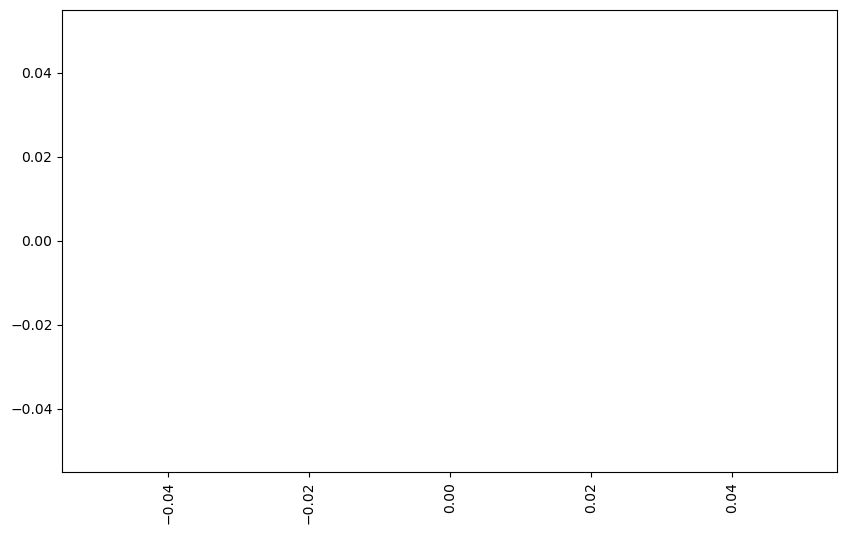

interactive(children=(Dropdown(description='selected_precinct', options=('precinct',), value='precinct'), Outp…

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the DataFrame for theft offenses
theft_df = new_df[new_df["offense"] == "AUTOTH"]

# Create a function to update the chart based on the selected precinct
def update_chart(selected_precinct):
    # Filter the DataFrame for the selected precinct
    precinct_df = theft_df[theft_df["precinct"] == selected_precinct]

    # Group the data by reportedDate and count the number of thefts
    thefts_by_date = precinct_df["reportedDate"].value_counts().sort_index()

    # Create the chart
    plt.figure(figsize=(10, 6))
    thefts_by_date.plot(kind="bar")
    plt.title("Number of Thefts by Date - Precinct: " + selected_precinct)
    plt.xlabel("Date")
    plt.ylabel("Number of Thefts")
    plt.xticks(rotation=45)
    plt.show()

# Create a dropdown menu to select the precinct
precincts = theft_df["precinct"].unique()
dropdown = pd.Series(precincts).to_frame(name="precinct")

# Call the update_chart function when the dropdown menu value changes
dropdown.style.set_properties(**{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

from ipywidgets import interact
interact(update_chart, selected_precinct=dropdown);

In [53]:
import plotly.graph_objects as go

# Get unique values from the 'precinct' column
unique_precincts = df_clean['precinct'].unique()

# Create an empty figure
fig = go.Figure()

# Iterate over unique precincts and add traces to the figure
for precinct in unique_precincts:
    filtered_df = df_clean[df_clean['precinct'] == precinct]
    daily_counts = filtered_df['reportedDate'].value_counts().sort_index()
    fig.add_trace(go.Scatter(x=daily_counts.index, y=daily_counts.values, name=f'Precinct {precinct}'))

# Create dropdown menu options
dropdown_buttons = []
for precinct in unique_precincts:
    dropdown_buttons.append({'label': f'Precinct {precinct}', 'method': 'update', 'args': [{'visible': [precinct == trace.name for trace in fig.data]}]})

# Add dropdown menu to the figure
fig.update_layout(updatemenus=[{'buttons': dropdown_buttons, 'direction': 'down', 'showactive': True}])

# Customize axis labels
fig.update_layout(xaxis_title='Date', yaxis_title='Autotheft Count')

# Show the figure
fig.show()